In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from udisc_stats.preprocess import *
from udisc_stats.visualize import *

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
orig_df = pd.read_csv("~/Downloads/Udisc Scorecards 2.csv")

df = preprocess(orig_df)

2020-11-05 22:22:00


In [4]:
player = "Monkey"
course = "Bryan Park"
layout = "Yellows Tees"
holes = None
min_date = None
plot_dir = None
apply_filter_to_cal = False

if min_date is None:
    min_date = df.Date.min()
if isinstance(min_date, str):
    min_date = pd.Timestamp(min_date)

In [22]:
score_df = get_score_df(df, holes)
round_score_df = get_round_score_df(score_df)
score_avg_df = get_score_avg(round_score_df)
score_counts_df = get_score_counts(score_df)
month_agg_df = get_month_df(round_score_df)
cum_score_df = get_cumulative_score_df(df)
player_cum_score_df = cum_score_df[
    (cum_score_df["PlayerName"]==player) &
    (cum_score_df["CourseName"]==course) &
    (cum_score_df["LayoutNameAdj"]==layout)
]
player_score_df = score_df[
    (score_df.PlayerName == player) &
    (score_df.CourseName == course) &
    (score_df.LayoutNameAdj == layout)
]
hist_df = get_hist_df(player_score_df)

/Users/justinessert/github/projects/udisc_stats/udisc_stats/visualize.py:117: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  round_score_df = score_df.groupby(seg_cols + ["Date", "Year"]).sum().reset_index()
/Users/justinessert/github/projects/udisc_stats/udisc_stats/visualize.py:136: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ] = score_df.groupby(seg_hole_cols).sum().groupby(seg_cols).cumsum().reset_index()["Diff"].astype(float)


In [23]:
hist_df

,Hole,Score,ScoreName,Par,Count,Order,Diff
0,Hole01,1.0,Eagle-,3.0,1.0,0,-2.0
1,Hole01,2.0,Birdie,3.0,48.0,1,-1.0
2,Hole01,3.0,Par,3.0,160.0,2,0.0
3,Hole01,4.0,Bogie,3.0,21.0,3,1.0
4,Hole01,5.0,Double Bogie,3.0,8.0,4,2.0
5,Hole01,NaN,Triple Bogie+,NaN,0.0,5,NaN
6,Hole02,NaN,Eagle-,NaN,0.0,0,NaN
7,Hole02,2.0,Birdie,3.0,28.0,1,-1.0
8,Hole02,3.0,Par,3.0,163.0,2,0.0
9,Hole02,4.0,Bogie,3.0,38.0,3,1.0


/Users/justinessert/github/projects/udisc_stats/udisc_stats/visualize.py:282: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  


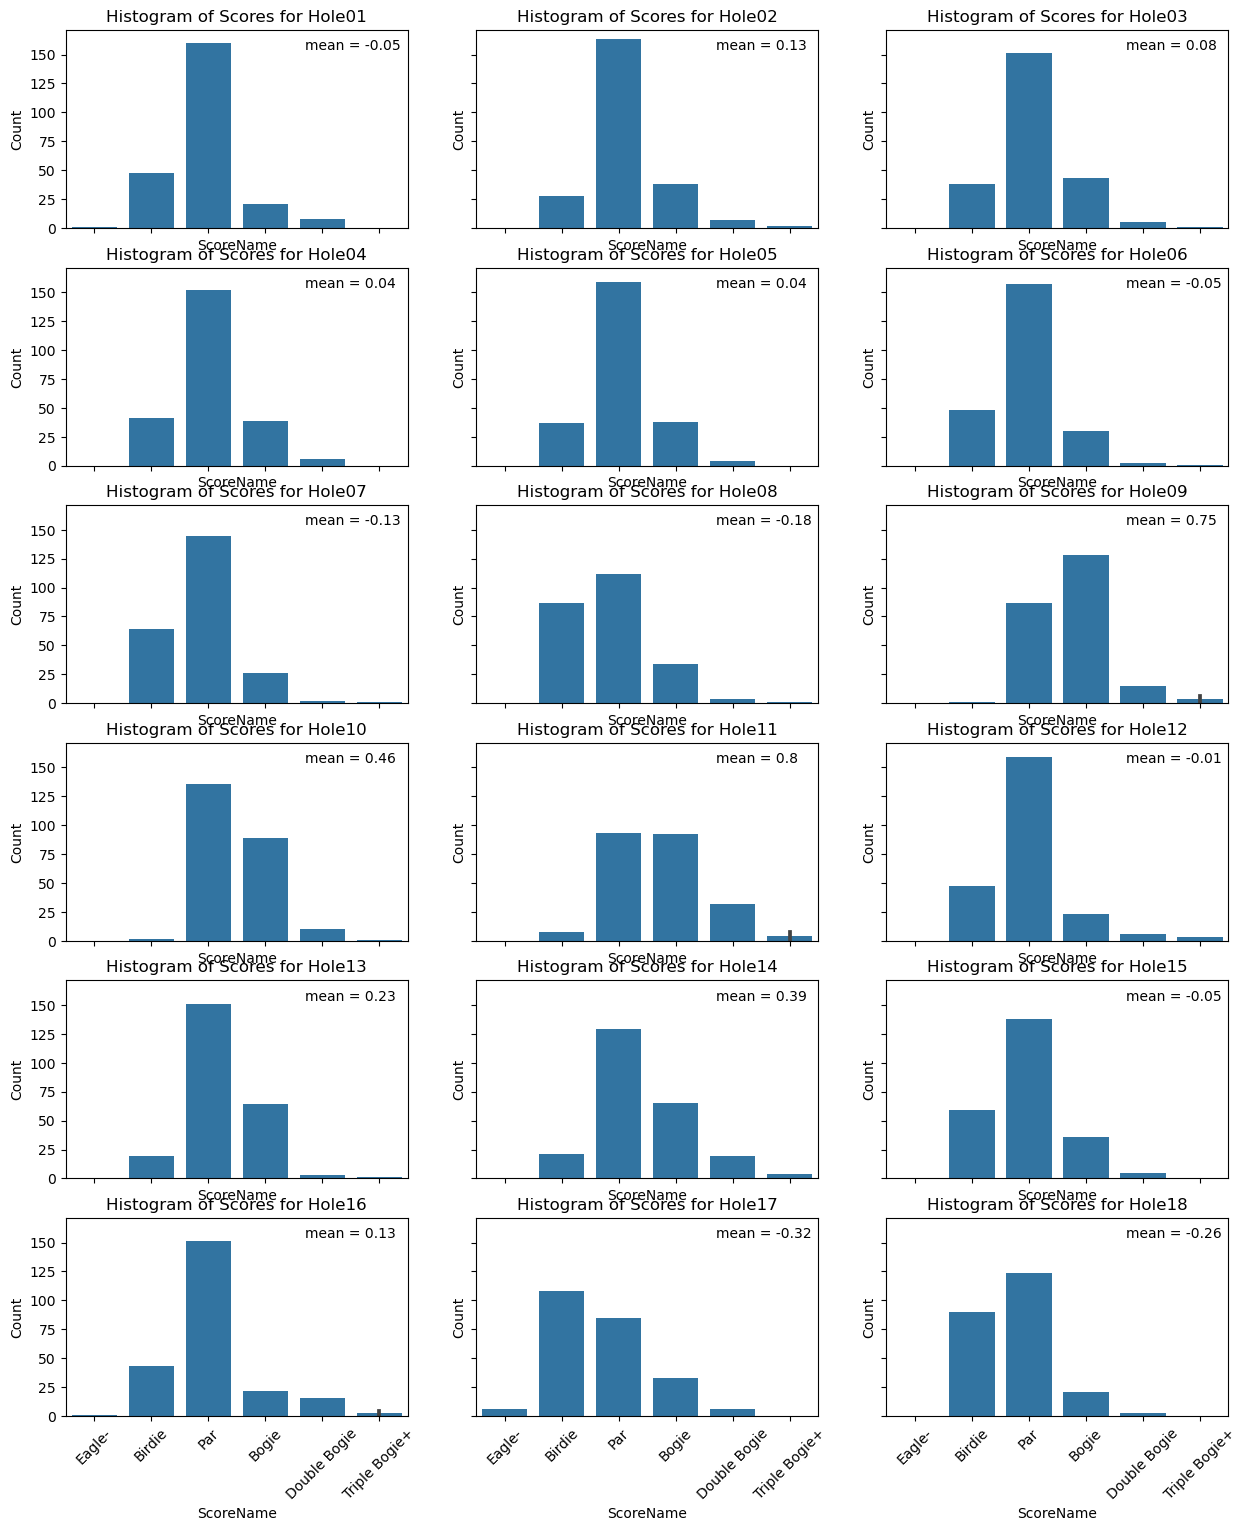

In [25]:
plot_histogram(hist_df);

In [9]:
seg_cols = ["Hole", "Score", "ScoreName", "Par"]
hist_df = player_score_df[seg_cols + ["Diff"]].groupby(seg_cols).count().reset_index()
hist_df.rename(columns={"Diff": "Count"}, inplace=True)
hist_df

,Hole,Score,ScoreName,Par,Count
0,Hole01,1.0,Eagle-,3.0,1
1,Hole01,2.0,Birdie,3.0,48
2,Hole01,3.0,Par,3.0,160
3,Hole01,4.0,Bogie,3.0,21
4,Hole01,5.0,Double Bogie,3.0,8
5,Hole02,2.0,Birdie,3.0,28
6,Hole02,3.0,Par,3.0,163
7,Hole02,4.0,Bogie,3.0,38
8,Hole02,5.0,Double Bogie,3.0,7
9,Hole02,6.0,Triple Bogie+,3.0,2


In [10]:
holes = list(hist_df.Hole.unique())
score_names = list(hist_df.ScoreName.unique())

all_scores = pd.DataFrame(list(product(holes, score_names)), columns=["Hole", "ScoreName"])

hist_df = hist_df.merge(all_scores, on=["Hole", "ScoreName"], how="outer")
hist_df["Order"] = hist_df["ScoreName"].map(lambda x: score_names.index(x))
hist_df = hist_df.sort_values(["Hole", "Order"]).reset_index(drop=True)
hist_df.Count.fillna(0, inplace=True)

In [12]:
hist_df["Diff"] = hist_df["Score"] - hist_df["Par"]

/var/folders/vn/_ss7bwsn35114680xw9lc9nw0000gn/T/ipykernel_32621/2080688270.py:22: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


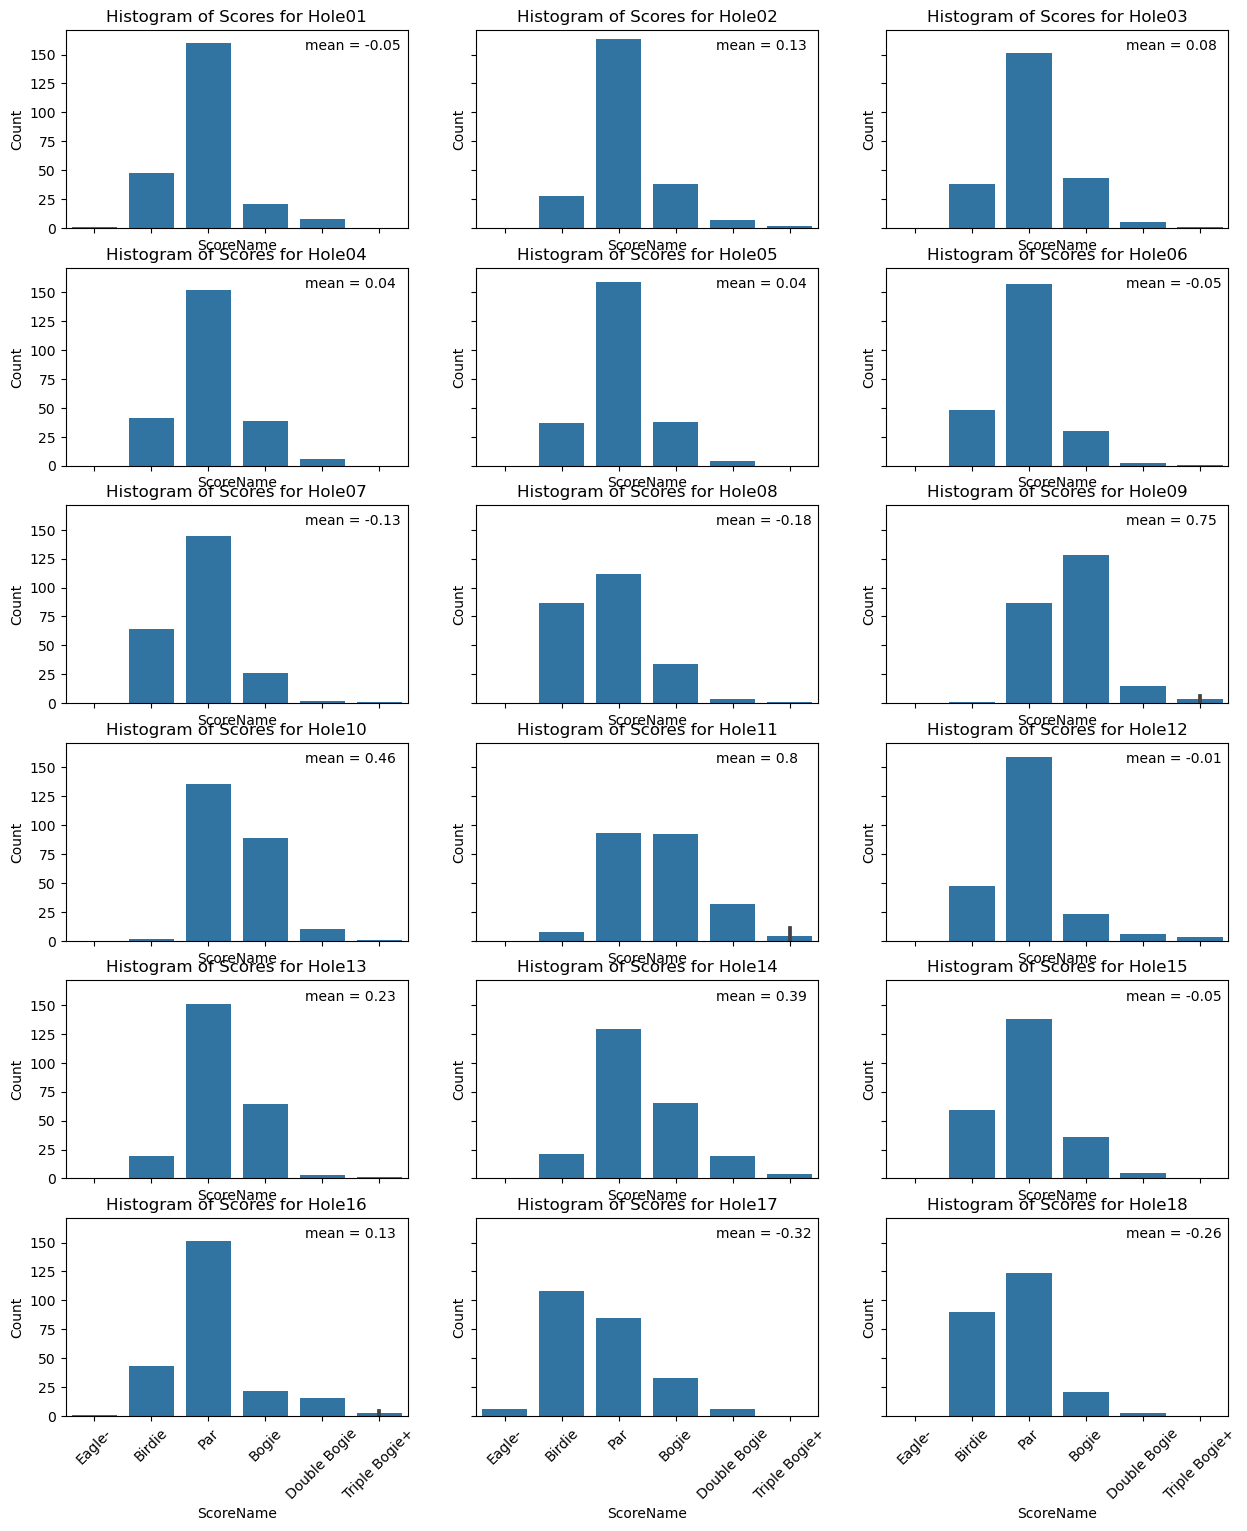

In [21]:
score_names = list(hist_df["ScoreName"].unique())
holes = list(hist_df["Hole"].unique())
cols = 3
rows = ceil(len(holes) / cols)
fig, axes = plt.subplots(rows, cols, figsize=(15,3*rows), sharex="all", sharey="all")
for i, hole in enumerate(holes):
    row = i // cols
    col = i % cols

    ax=axes[row][col]

    viz_df = hist_df[hist_df["Hole"] == hole]

    sns.barplot(x="ScoreName", y="Count",
                data=viz_df, color=sns.color_palette()[0],
                ax=ax,
    )
    ax.set_title(f"Histogram of Scores for {hole}")
    average = round((viz_df["Diff"] * viz_df["Count"]).sum() / viz_df["Count"].sum(), 2)
    plt.text(0.7, 0.9, s = 'mean = {0}'.format(average),transform=ax.transAxes)
    ax.set_xticklabels(score_names, rotation = 45)
plt.tight_layout()

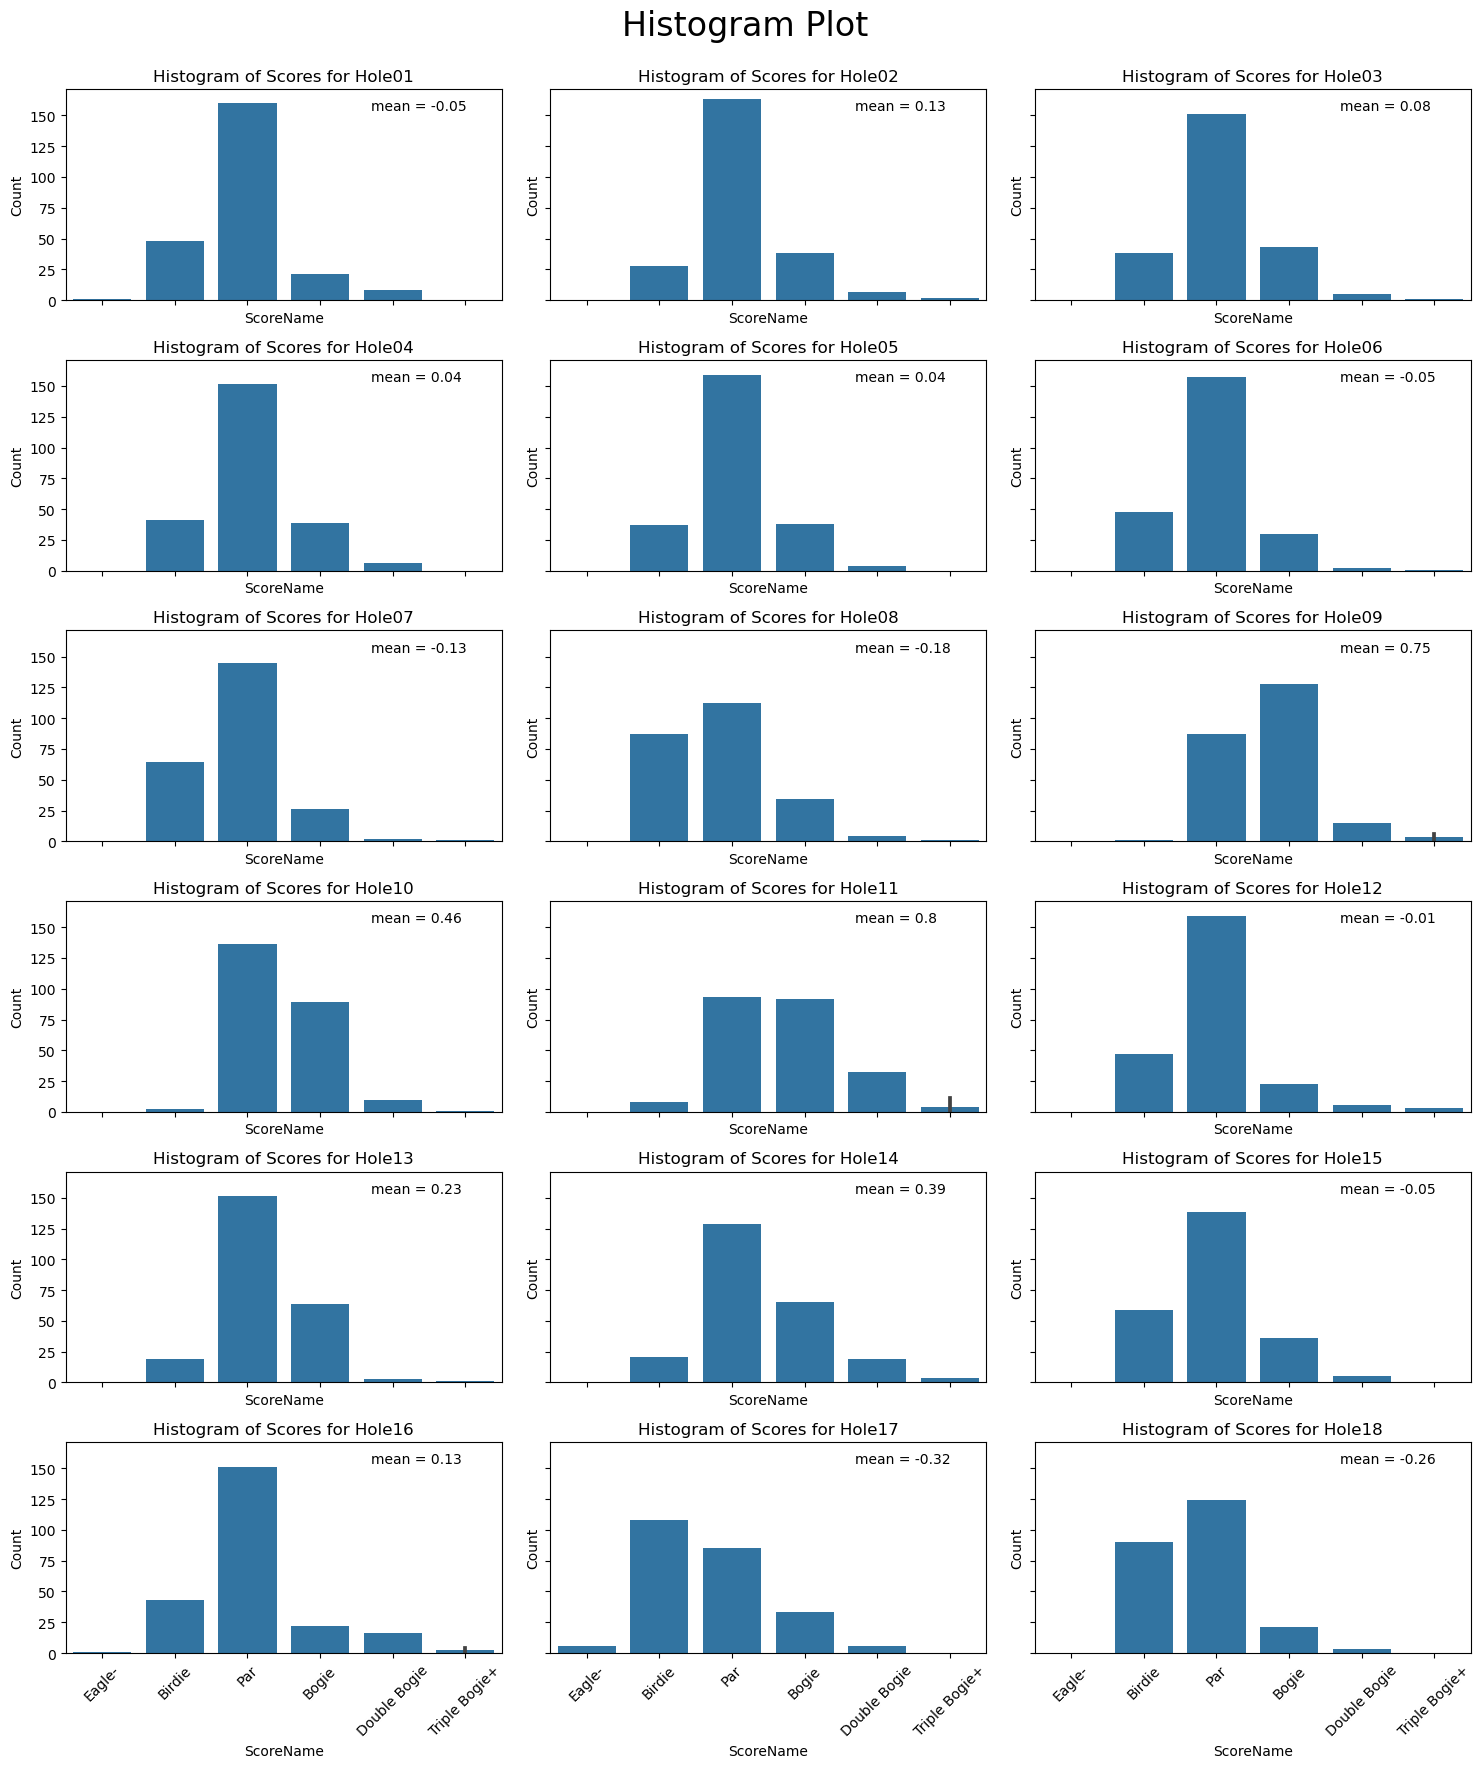

In [43]:
score_names = list(hist_df["ScoreName"].unique())
holes = list(hist_df["Hole"].unique())
cols = 3
rows = ceil(len(holes) / cols)
fig, axes = plt.subplots(rows, cols, figsize=(15,3*rows), sharex="all", sharey="all")
for i, hole in enumerate(holes):
    row = i // cols
    col = i % cols

    ax=axes[row][col]

    viz_df = hist_df[hist_df["Hole"] == hole]

    sns.barplot(x="ScoreName", y="Count",
                data=viz_df, color=sns.color_palette()[0],
                ax=ax,
    )
    ax.set_title(f"Histogram of Scores for {hole}")
    ax.set_xticklabels(score_names, rotation = 45)
    
fig.suptitle("Histogram Plot\n", fontsize=24, linespacing=1)

plt.tight_layout()

# Added after tight_layout because tight_layout doesn't work when doing this with the rest
for i, hole in enumerate(holes):
    row = i // cols
    col = i % cols

    ax=axes[row][col]

    viz_df = hist_df[hist_df["Hole"] == hole]

    average = round((viz_df["Diff"] * viz_df["Count"]).sum() / viz_df["Count"].sum(), 2)
    plt.text(0.7, 0.9, s = 'mean = {0}'.format(average),transform=ax.transAxes)